# Data Exploration

The purpose of this activity is to gain a greater understanding of our data through exploration. We also identify and analyze how to handle any data quality issues. 

In [24]:
import pandas as pd 
import numpy as np 
import os
import math 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Data

In [25]:
path = "."
fname = os.path.join(path, "raw_data.csv")
df = pd.read_csv(fname)

In [26]:
display(df.head())

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [27]:
totalrows = df.shape[0]
print("Num of rows: ", df.shape[0])
print("Num of cols: ", df.shape[1])

Num of rows:  62642
Num of cols:  29


In [28]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [30]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data issues

In [31]:
#find rows that aren't thoroughly populated
df.count()[df.count() < totalrows] 

company         62637
level           62523
tag             61788
gender          43102
otherdetails    40137
dmaid           62640
Race            22427
Education       30370
dtype: int64

In [32]:
#find number of missing values and percentage of missing data for each column in the dataset 
df_pop = pd.DataFrame(data = df.columns.values, columns = ['columns'])
df_pop[ 'missing_values'] =  df.isna().sum().values
df_pop['perc_populated'] = round(100*(totalrows - df_pop['missing_values'])/totalrows, 2) 
df_pop

,columns,missing_values,perc_populated
0,timestamp,0,100.00
1,company,5,99.99
2,level,119,99.81
3,title,0,100.00
4,totalyearlycompensation,0,100.00
5,location,0,100.00
6,yearsofexperience,0,100.00
7,yearsatcompany,0,100.00
8,tag,854,98.64
9,basesalary,0,100.00


### Company

In [33]:
#count of records by company 
t = df.groupby(['company']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index()#data clean up 
t[['company', 'count']] 

,company,count
0,Amazon,8126
1,Microsoft,5216
2,Google,4330
3,Facebook,2990
4,Apple,2028
...,...,...
1626,Truecar,1
1627,Cirrus logic,1
1628,Cisco systems,1
1629,Trinet,1


Text(0.5, 1.0, 'Number of salaries reported for top 10 Companies')

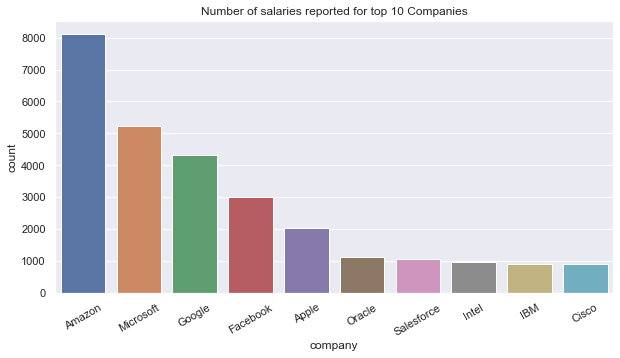

In [34]:
t = t.head(10)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x="company", y="count", data=t)
ax.tick_params(axis='x', rotation=30)
ax.set_title('Number of salaries reported for top 10 Companies')

## level           

In [35]:
#count of records by level 
t = df.groupby(['level']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index()#data clean up 
t[['level', 'count']]

,level,count
0,L4,5014
1,L5,4871
2,L3,3337
3,L6,2871
4,Senior Software Engineer,1443
...,...,...
2918,Regular Software Engineer,1
2919,Regular Development Engineer,1
2920,ETW,1
2921,Regional Sales Manager,1


In [36]:
#check if there's any overlap in how levels are used across the big 5 companies, 
#we observe very little overlap so not very meaningful 
t = df.groupby(['company','level']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index()#data clean up 
big5 = ['Amazon', 'Microsoft', 'Google', 'Facebook', 'Apple']
r = t[['level', 'count']].sort_values(by=['count'], ascending = False).head(20).level.values
s = t.loc[t['company'].isin(big5) & t['level'].isin(r)][['company','level', 'count']]
s.pivot(index='company', columns='level', values='count')


level,59,60,61,62,63,64,65,E4,E5,ICT3,ICT4,L3,L4,L5,L6,L7,SDE I,SDE II
company,,,,,,,,,,,,,,,,,,
Amazon,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,1645.0,2602.0,1755.0,473.0,418.0,398.0
Apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,619.0,728.0,37.0,37.0,7.0,NaN,NaN,NaN,NaN
Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,632.0,NaN,NaN,82.0,57.0,54.0,22.0,9.0,NaN,NaN
Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1134.0,1335.0,914.0,324.0,114.0,NaN,NaN
Microsoft,548.0,592.0,719.0,755.0,738.0,591.0,389.0,NaN,NaN,NaN,NaN,7.0,4.0,4.0,NaN,NaN,1.0,75.0


## tag             

In [37]:
#count of records by tag 
#filter to tags associated with atleast 100 records 
t = df.groupby(['tag']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count_'}).reset_index()#data clean up 
t[['tag', 'count_']].loc[t.count_>100]#.head(20)

,tag,count_
0,Full Stack,11382
1,Distributed Systems (Back-End),10838
2,API Development (Back-End),6277
3,ML / AI,4204
4,Web Development (Front-End),2971
5,Product,1801
6,Data,1586
7,DevOps,1573
8,Security,1204
9,Networking,1178


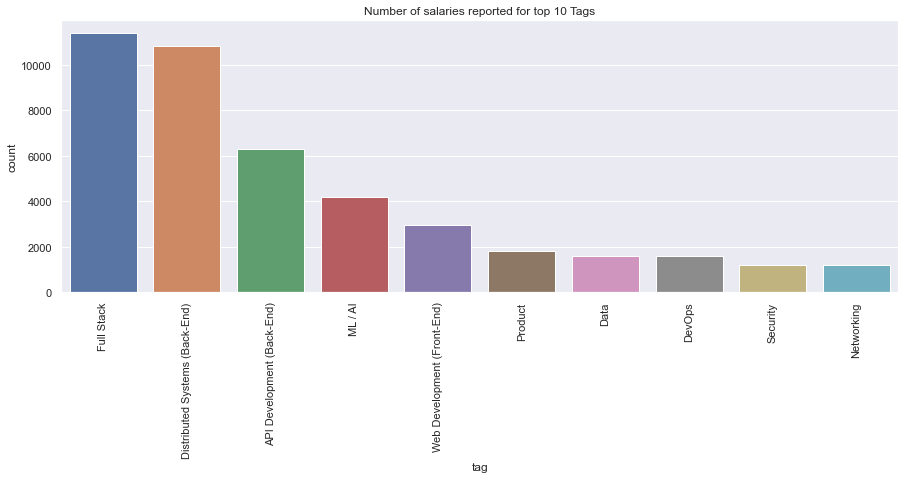

In [47]:
t = df.groupby(['tag']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().head(10)#data clean up 
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x="tag", y="count", data=t)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of salaries reported for top 10 Tags')
None

## dmaid 

In [49]:
#Inspect dmaid column
print("Total unique values: ", df.dmaid.unique().size) 
print(df.dmaid.unique()[:10])# not sure what this is - drop column?

Total unique values:  150
[807. 819.   0. 501. 512. 862. 820. 803. 511. 635.]


## Gender          

In [50]:
#Inspect gender columns
print("Total unique values: ", df.dmaid.unique().size) 
print(df.gender.unique()) #clean up

Total unique values:  150
[nan 'Male' 'Female' 'Other' 'Title: Senior Software Engineer']


In [52]:
#count of records by gender
t = df.fillna(value={'gender': 'Not specified'})
t = t.groupby(['gender']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().head(10)#data clean up 
t[['gender', 'count']] #decide imputation technique

,gender,count
0,Male,35702
1,Not specified,19540
2,Female,6999
3,Other,400
4,Title: Senior Software Engineer,1


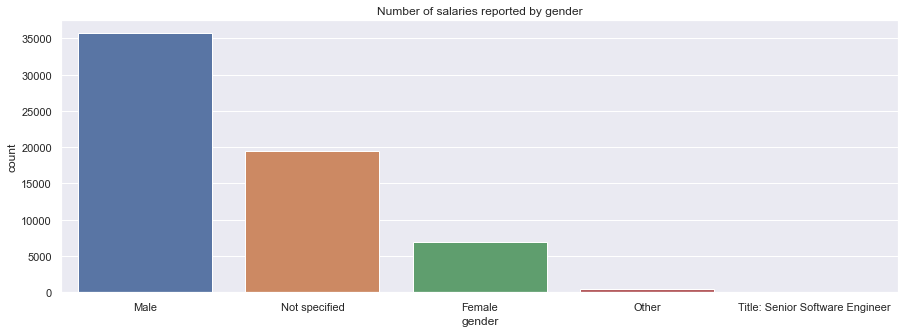

In [55]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x="gender", y="count", data=t)
ax.set_title('Number of salaries reported by gender')
None

## Race

In [58]:
#Inspect race 
print("total num of unique values:", df.Race.unique().size)
print(df.Race.unique())

total num of unique values: 6
[nan 'White' 'Asian' 'Black' 'Two Or More' 'Hispanic']


In [59]:
race_cols = ['Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'] 

In [66]:
#do some data validation 
t = df[race_cols].copy()#.info()
t['total'] = t.sum(axis=1)#.copy()
t.loc[t.total>1] # identify as both race, but race two or more is 0  

,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,total
41956,1,0,0,0,1,2


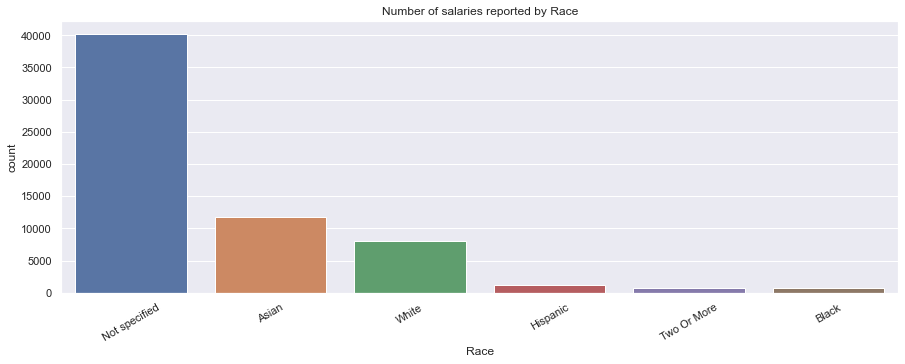

In [68]:
t = df.fillna(value={'Race': 'Not specified'})
t = t.groupby(['Race']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().head(10)#data clean up 
ax = sns.barplot(x="Race", y="count", data=t)
ax.tick_params(axis='x', rotation=30) # many unidentified, decide imputation technique 
ax.set_title('Number of salaries reported by Race')
None

## cityid/location

In [69]:
#Inspect city/location 
print("cityid unique values count:", len(df['cityid'].unique()))
print("location unique values count: ", len(df['location'].unique()))

cityid unique values count: 1045
location unique values count:  1050


In [70]:
#do some data validation between cityid and location 
t = df[['cityid', 'location']].drop_duplicates().groupby(['cityid']).count().sort_values(by=['location'], ascending = False).rename(columns={'location':'loc_count'}).reset_index()
s = t.loc[t.loc_count>1]
s # we observe records with multiple locations for a given city id 

,cityid,loc_count
0,0,2
1,3588,2
2,15900,2
3,8821,2
4,7418,2
5,13245,2
6,11434,2
7,13147,2
8,38731,2
9,8769,2


In [165]:
#inspect one such value and observe variations in spelling
df.loc[df.cityid == 15900][['cityid', 'location']].drop_duplicates().location.values 

array(['Tel Aviv, TA, Israel', 'Tel Aviv, Israel'], dtype=object)

In [167]:
#repeat for all records, and observe data issues 
for cid in s.cityid:
    locations = df.loc[df.cityid == cid][['cityid', 'location']].drop_duplicates().location.values
    print('city id: {}, locations: {}'.format(cid, locations)) #can potentially group by country? 

city id: 0, locations: ['Rome, NY' 'Troy, MI']
city id: 3588, locations: ['Taichung City, TP, Taiwan' 'Taichung City, CN, China']
city id: 15900, locations: ['Tel Aviv, TA, Israel' 'Tel Aviv, Israel']
city id: 8821, locations: ['Cambridge, MA, United States' 'Cambridge, MA']
city id: 7418, locations: ['San Fernando, LB, Philippines' 'San Fernando, CA']
city id: 13245, locations: ['San Francisco, CA' 'San Francisco De Dos Rios, SJ, Costa Rica']
city id: 11434, locations: ['Richmond, VA' 'Richmond, VA, United States']
city id: 13147, locations: ['Chennai, undefined, India' 'Chennai, TN, India']
city id: 38731, locations: ['Sunnyvale, CA' 'Sunnyvale, TX']
city id: 8769, locations: ['Monroe, LA, United States' 'Monroe, LA']
city id: 24571, locations: ['Dublin, DN, Ireland' 'Dublin, IN']


### timestamp

In [64]:
#Breakdown timestamp to more meaningful units
df['timestamp'] = pd.to_datetime(df.timestamp)
df['date']= df['timestamp'].dt.date
df['year']= df['timestamp'].dt.year

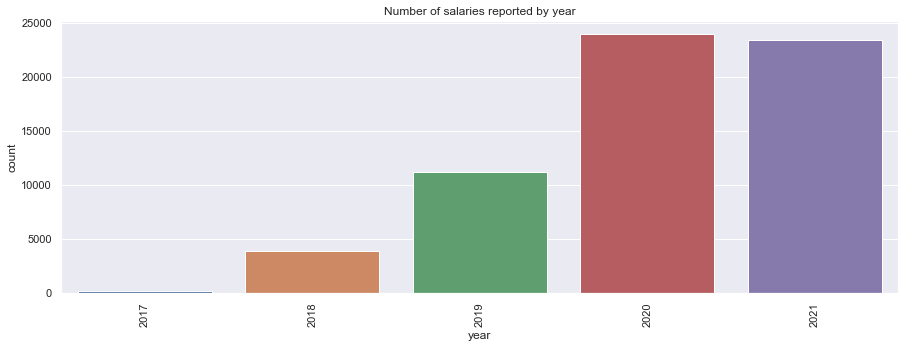

In [72]:
t = df.groupby(['year']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().head(10)#data clean up 
ax = sns.barplot(x="year", y="count", data=t)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of salaries reported by year')
None

### Education

In [74]:
#Inspect Education 
print("Num of unique values: ", df.Education.unique().size)
print(df.Education.unique())

Num of unique values:  6
[nan 'PhD' "Master's Degree" "Bachelor's Degree" 'Some College'
 'Highschool']


In [75]:
t = df.fillna(value={'Education': 'Not specified'})
t = t.groupby(['Education']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().head(10)#data clean up 
t[['Education', 'count']] #decide imputation technique, 50% missing values 

,Education,count
0,Not specified,32272
1,Master's Degree,15391
2,Bachelor's Degree,12601
3,PhD,1703
4,Some College,355
5,Highschool,320


In [76]:
edu_cols = ['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College']

#data validation 
t = df[edu_cols].copy()#.info()
t['total'] = t.sum(axis=1)#.copy()r
t.loc[t.total>1] # some identify the highest, other identify both, decide which to use

,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,total
12506,1,0,1,0,0,2
12513,1,0,1,0,0,2
12596,1,0,1,0,0,2
12616,1,0,1,0,0,2
12647,1,0,1,0,0,2
...,...,...,...,...,...,...
23405,1,0,1,0,0,2
23455,1,0,1,0,0,2
26567,1,1,0,0,0,2
39503,1,1,0,0,0,2


 ### rowNumber

In [186]:
len(df.rowNumber.unique()) #not useful, row identifier 

62642

### Title

In [77]:
print(df.title.unique())
#t = df.fillna(value={'Education': 'Not specified'})
t = df.groupby(['title']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().head(20)#data clean up 
t[['title', 'count']] #thoroughly populated 

['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Human Resources' 'Product Designer' 'Marketing' 'Business Analyst'
 'Hardware Engineer' 'Sales' 'Recruiter' 'Mechanical Engineer'
 'Management Consultant']


,title,count
0,Software Engineer,41231
1,Product Manager,4673
2,Software Engineering Manager,3569
3,Data Scientist,2578
4,Hardware Engineer,2200
5,Product Designer,1516
6,Technical Program Manager,1381
7,Solution Architect,1157
8,Management Consultant,976
9,Business Analyst,885


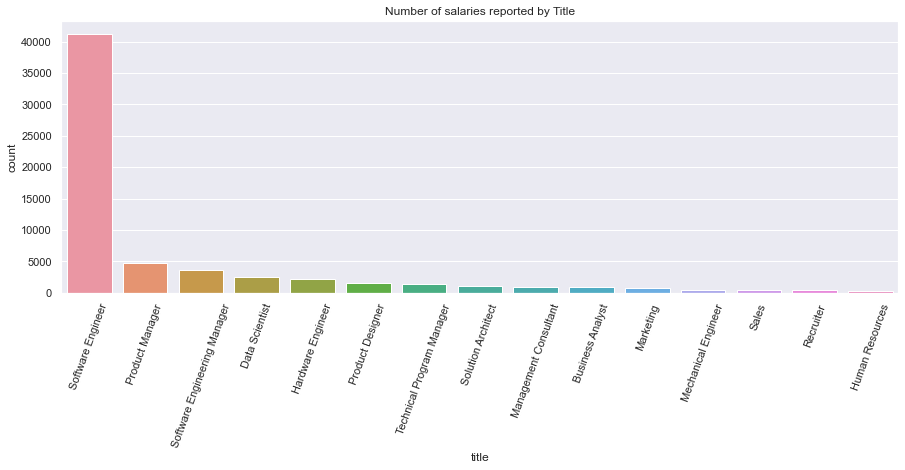

In [81]:
ax = sns.barplot(x="title", y="count", data=t)
ax.tick_params(axis='x', rotation=70)
ax.set_title('Number of salaries reported by Title')
None

### other details

In [82]:
t = df.loc[~df.otherdetails.isna()] #~50% values populated. freefrom text 
t.otherdetails

32                                        Tons of overtime
46                                                     PhD
58                                How do I access results?
60                                       Year 2 bonus, 24k
65       401k match 50%, vested immediately, up to the ...
                               ...                        
62581             Sign on bonus - 45k(Not included in TC).
62588                                         70000 signon
62591    40k cash split over 2 years. 75k rsus over 4 y...
62610    65k of stocks at 5/15/40/40 vesting schedule p...
62627                                        industry hire
Name: otherdetails, Length: 40137, dtype: object

In [83]:
t = t.groupby(['otherdetails']).count().sort_values(by=['timestamp'], ascending = False).rename(columns={'timestamp':'count'}).reset_index().tail(10)#data clean up 
t[['otherdetails', 'count']] #repearing education, title, race info --> add more exclusion criteria to see if there's useful info 

,otherdetails,count
12831,"Remote, Title: Software Engineer 3, Academic L...",1
12832,"Remote, Title: Software Engineer 3, Race: Asia...",1
12833,"Remote, Title: Software Engineer 4",1
12834,"Remote, Title: Software Engineer 4, Race: Whit...",1
12835,"Remote, Title: Software Engineer Advisor, Race...",1
12836,"Remote, Title: Software Engineer Associate, Ra...",1
12837,"Remote, Title: Software Engineer Co-op",1
12838,"Remote, Title: Software Engineer E1, Race: His...",1
12839,"Remote, Title: Software Engineer I",1
12840,"€4k Relocation bonus, Race: Asian, Academic Le...",1


### Numeric cols

In [88]:
num_cols = ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany','basesalary','stockgrantvalue', 'bonus'] 
df[num_cols].describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000


In [85]:
salary_cols = [ 'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']
#data validation - see if total adds up to all other columns 
t = df[salary_cols
      ].copy()#.info()
t['total'] = t['basesalary'] + t['stockgrantvalue'] + t['bonus']
t.loc[t.total != t.totalyearlycompensation]

,totalyearlycompensation,basesalary,stockgrantvalue,bonus,total
0,127000,107000.0,20000.0,10000.0,137000.0
1,100000,0.0,0.0,0.0,0.0
2,310000,155000.0,0.0,0.0,155000.0
4,157000,0.0,0.0,0.0,0.0
5,208000,0.0,0.0,0.0,0.0
...,...,...,...,...,...
62636,172000,142000.0,15000.0,14200.0,171200.0
62638,237000,146900.0,73200.0,16000.0,236100.0
62639,220000,157000.0,25000.0,20000.0,202000.0
62640,280000,194688.0,57000.0,29000.0,280688.0


In [86]:
df[num_cols].describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000


In [87]:
#check how many 0's are reported for each column 
for col in num_cols:
    c = df.loc[df[col] == 0].count()['timestamp']
    print('{} : {}'.format(col, c))

totalyearlycompensation : 0
yearsofexperience : 4603
yearsatcompany : 15916
basesalary : 2304
stockgrantvalue : 17178
bonus : 15427
